# Dynamic chaos in the kicked “photon-qubit atom"

## Rabi Model

## Plot mapping for system

In [53]:
import numpy as np
import math as mp
import matplotlib as mpl
import matplotlib.pyplot as plt
import qutip
from tqdm import trange, notebook
from time import sleep
from odeintw import odeintw
from pylab import *
from matplotlib import cm


#  define system of motion equations 
def func(z,t):
    p, q, u, v = z
    return [-w**2 * q - ge * (np.conj(u) * v + u * np.conj(v)), p, 
            ((w2 / 2) * u + ge * q * v)/1j, (-(w2 / 2) * v + ge * q * u)/1j]


#  initial conditions
#-----------------------
w = 1                  #  photonic field frequency
w2 = w                 #  qubit frequency
r = 1/5                #  frequency ratio
Tk = 2 * np.pi *r / w  #  period of an external driving force 

ge = 0.41              #  coupling parameter
f0 = 20               #  external driving force amplitude
q0 = 1                 #  initial coordinate
p0 = 1                 #  initial impulse
u0 = np.sqrt(1e-20/2)   #  initial spinor component U
v0 = np.sqrt(2/2)      #  initial spinor component V

n_steps = 25000        #  number of periods

print('Tk = ', Tk)
print('T = ', 2 * np.pi / w)


Q = np.zeros(n_steps + 1, dtype=complex) 
P = np.zeros(n_steps + 1, dtype=complex)    
U = np.zeros(n_steps + 1, dtype=complex)   
V = np.zeros(n_steps + 1, dtype=complex)

P[0] = p0
Q[0] = q0
U[0] = u0
V[0] = v0

mxsteps = n_steps  #  step number in solving diff. equation

if n_steps <= 1000:
    mxsteps = 1000

#  mapping for (p, q, u, v)
for n in notebook.tqdm(range(1, n_steps + 1)):

    tn = Tk * (n - 1)
    
    p0 = P[n - 1] + f0
    q0 = Q[n - 1]    
    u0 = U[n - 1]
    v0 = V[n - 1]
    
    z0 = [p0, q0, u0, v0]

    sol = odeintw(func, z0, [tn ,tn + Tk], atol=1e-12, rtol=1e-10, mxstep=500000)
    #print(sol)
    P[n] = sol[-1,0]
    Q[n] = sol[-1,1]
    U[n] = sol[-1,2]
    V[n] = sol[-1,3]
#print(P)

Tk =  1.2566370614359172
T =  6.283185307179586


  0%|          | 0/25000 [00:00<?, ?it/s]

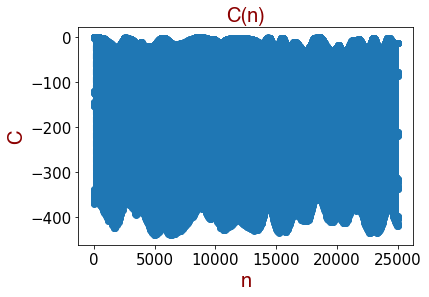

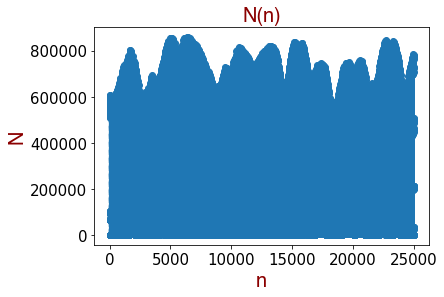

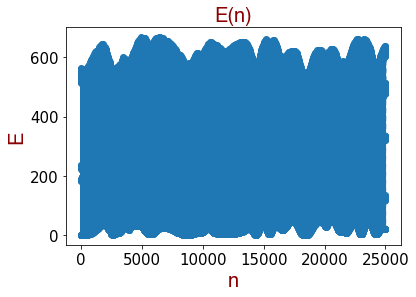

In [54]:
#  integrals of motion

font = {'family': 'helvetica',
        'color':  'darkred',
        'weight': 'bold',
        'size': 20,
        }

fontTitle = {'family': 'helvetica',
        'color':  'darkred',
        'weight': 'bold',
        'size': 20,
        }

sigma_x = [[0, 1], [1, 0]]
sigma_y = [[0, -1j], [1j, 0]]
sigma_z = [[1, 0], [0, -1]]
ident = np.identity(2, dtype=complex)

C = [np.sqrt(2 * w) * ge * np.dot(sigma_x, q) - np.sqrt(2 / w) * ge * np.dot(sigma_y, p) for q, p in zip(Q,P)]
N = [np.sqrt(w / 2) * np.dot(q**2, ident) + np.sqrt(1 / (2 * w)) * np.dot(p**2, ident) +
     np.dot(1/2, ident) + sigma_z for q, p in zip(Q,P)]
Ep = [(1/2) * w + (w / 2 * q**2 + p**2 / w / 2 + 1) * w 
      + ge * np.sqrt(w / 2 * q**2 + p**2 / w / 2 + 1) for q, p in zip(Q,P)]
Em = [(1/2) * w + (w / 2 * q**2 + p**2 / w / 2 + 1) * w 
      - ge * np.sqrt(w / 2 * q**2 + p**2 / w / 2 + 1) for q, p in zip(Q,P)]

C = np.round(C, 3)
N = np.round(N, 3)
Ep = np.round(Ep, 3)


#fig = plt.figure(figsize=(10,8), dpi=150)
plt.plot(np.linalg.det(abs(np.asarray(C))), '--o')
plt.xlabel('n', fontdict=font)
plt.ylabel('C', fontdict=font)
plt.title('C(n)', fontdict=fontTitle)
plt.show()
#fig.savefig('qubit_C,' + 'r=' + str(r) + ',f0=' + str(phi) + ',ge=' + str(ge) + '.png', dpi=fig.dpi)

#fig = plt.figure(figsize=(10,8), dpi=150)
plt.plot(np.linalg.det(abs(np.asarray(N))), '--o')
plt.xlabel('n', fontdict=font)
plt.ylabel('N', fontdict=font)
plt.title('N(n)', fontdict=fontTitle)
plt.show()
#fig.savefig('qubit_N,' + 'r=' + str(r) + ',f0=' + str(phi) + ',ge=' + str(ge) + '.png', dpi=fig.dpi)

#fig = plt.figure(figsize=(10,8), dpi=150)
plt.plot(abs(np.asarray(Ep)), '--o')
plt.xlabel('n', fontdict=font)
plt.ylabel('E', fontdict=font)
plt.title('E(n)', fontdict=fontTitle)
plt.show()
#fig.savefig('qubit_E,' + 'r=' + str(r) + ',f0=' + str(phi) + ',ge=' + str(ge) + '.png', dpi=fig.dpi)

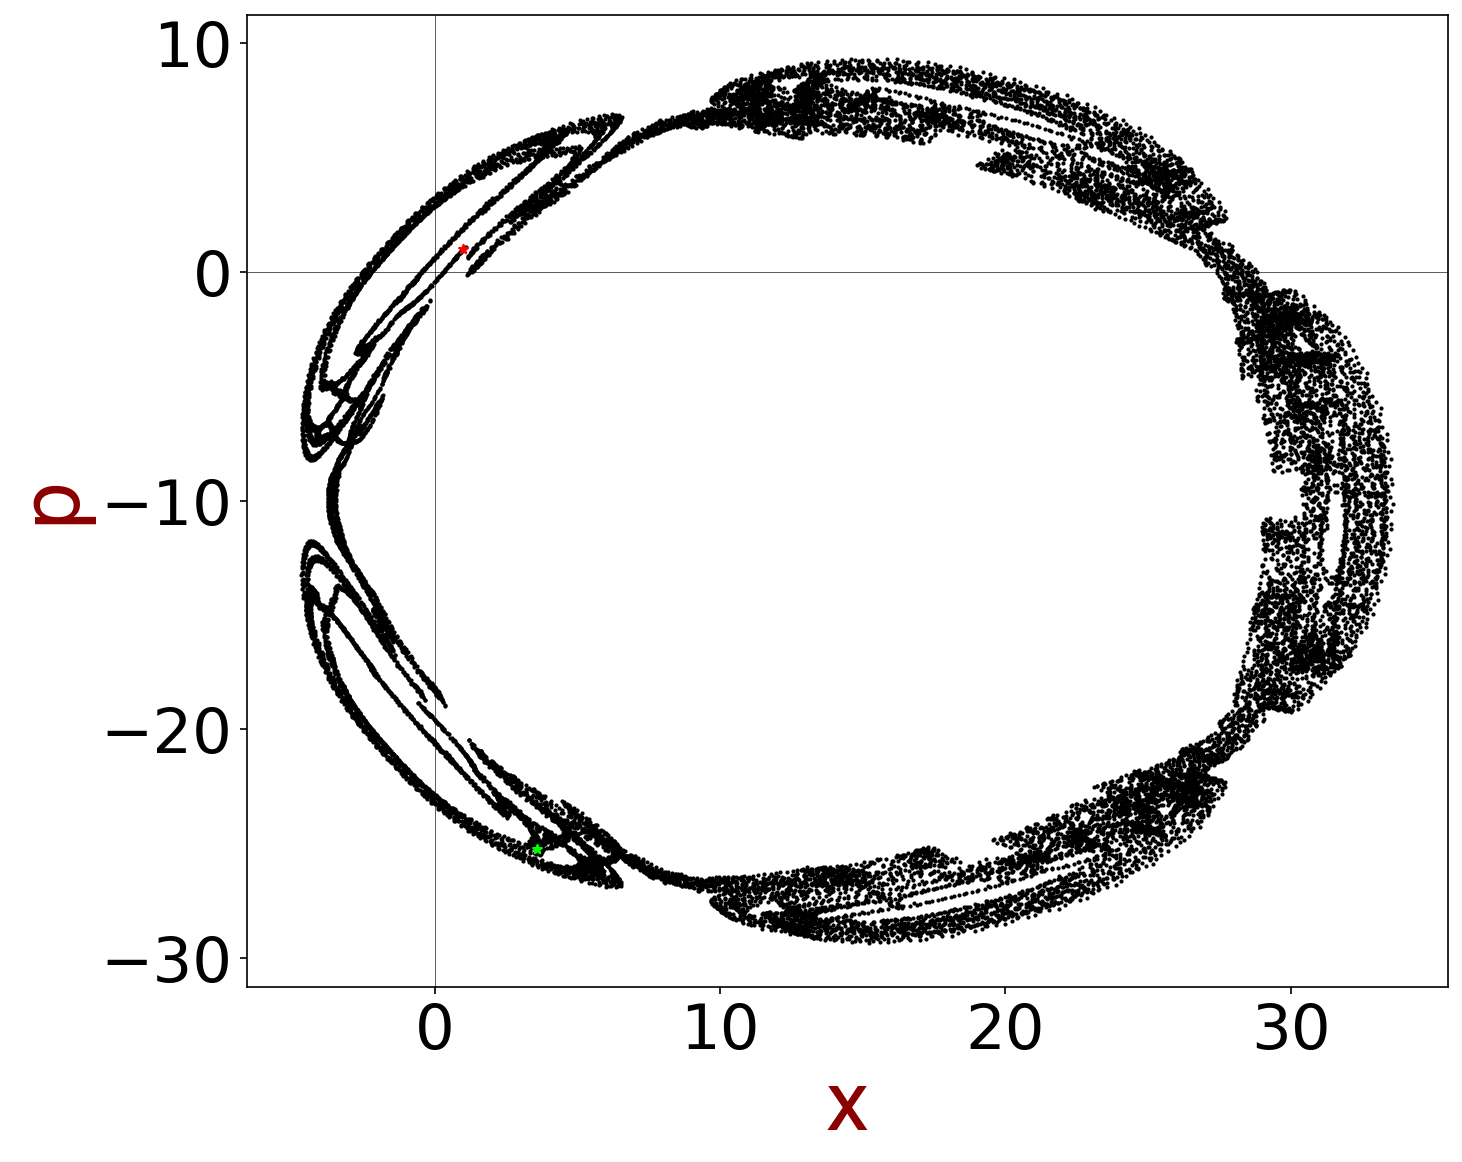

In [55]:
textsize = 30
#  plot for (p, x)
fig = plt.figure(figsize=(10,8), dpi=150)

font = {'family': 'helvetica',
        'color':  'darkred',
        'weight': 'bold',
        'size': 40,
        }

fontTitle = {'family': 'helvetica',
        'color':  'darkred',
        'weight': 'bold',
        'size': textsize,
        }
plt.xlabel('x', fontdict=font)
plt.ylabel('p', fontdict=font)

plt.scatter(np.round(Q.real[1:-2], 3),np.round(P.real[1:-2], 3), s=1, c='black')
plt.scatter(np.round(Q.real[0], 3),np.round(P.real[0], 3), marker='*', s=20, c='red')
plt.scatter(np.round(Q.real[-1], 3),np.round(P.real[-1], 3), marker='*', s=20, c='lime')
plt.axhline(y=0, color='k', lw=0.3)
plt.axvline(x=0, color='k', lw=0.3)
plt.tick_params(labelsize=textsize)
#plt.grid()
plt.tight_layout()
plt.show()
fig.savefig('images/oscillator/osc_px,' + 'r=' + str(r) + ',f0=' + str(f0) + ',ge=' + str(ge) + '.png', dpi=fig.dpi)

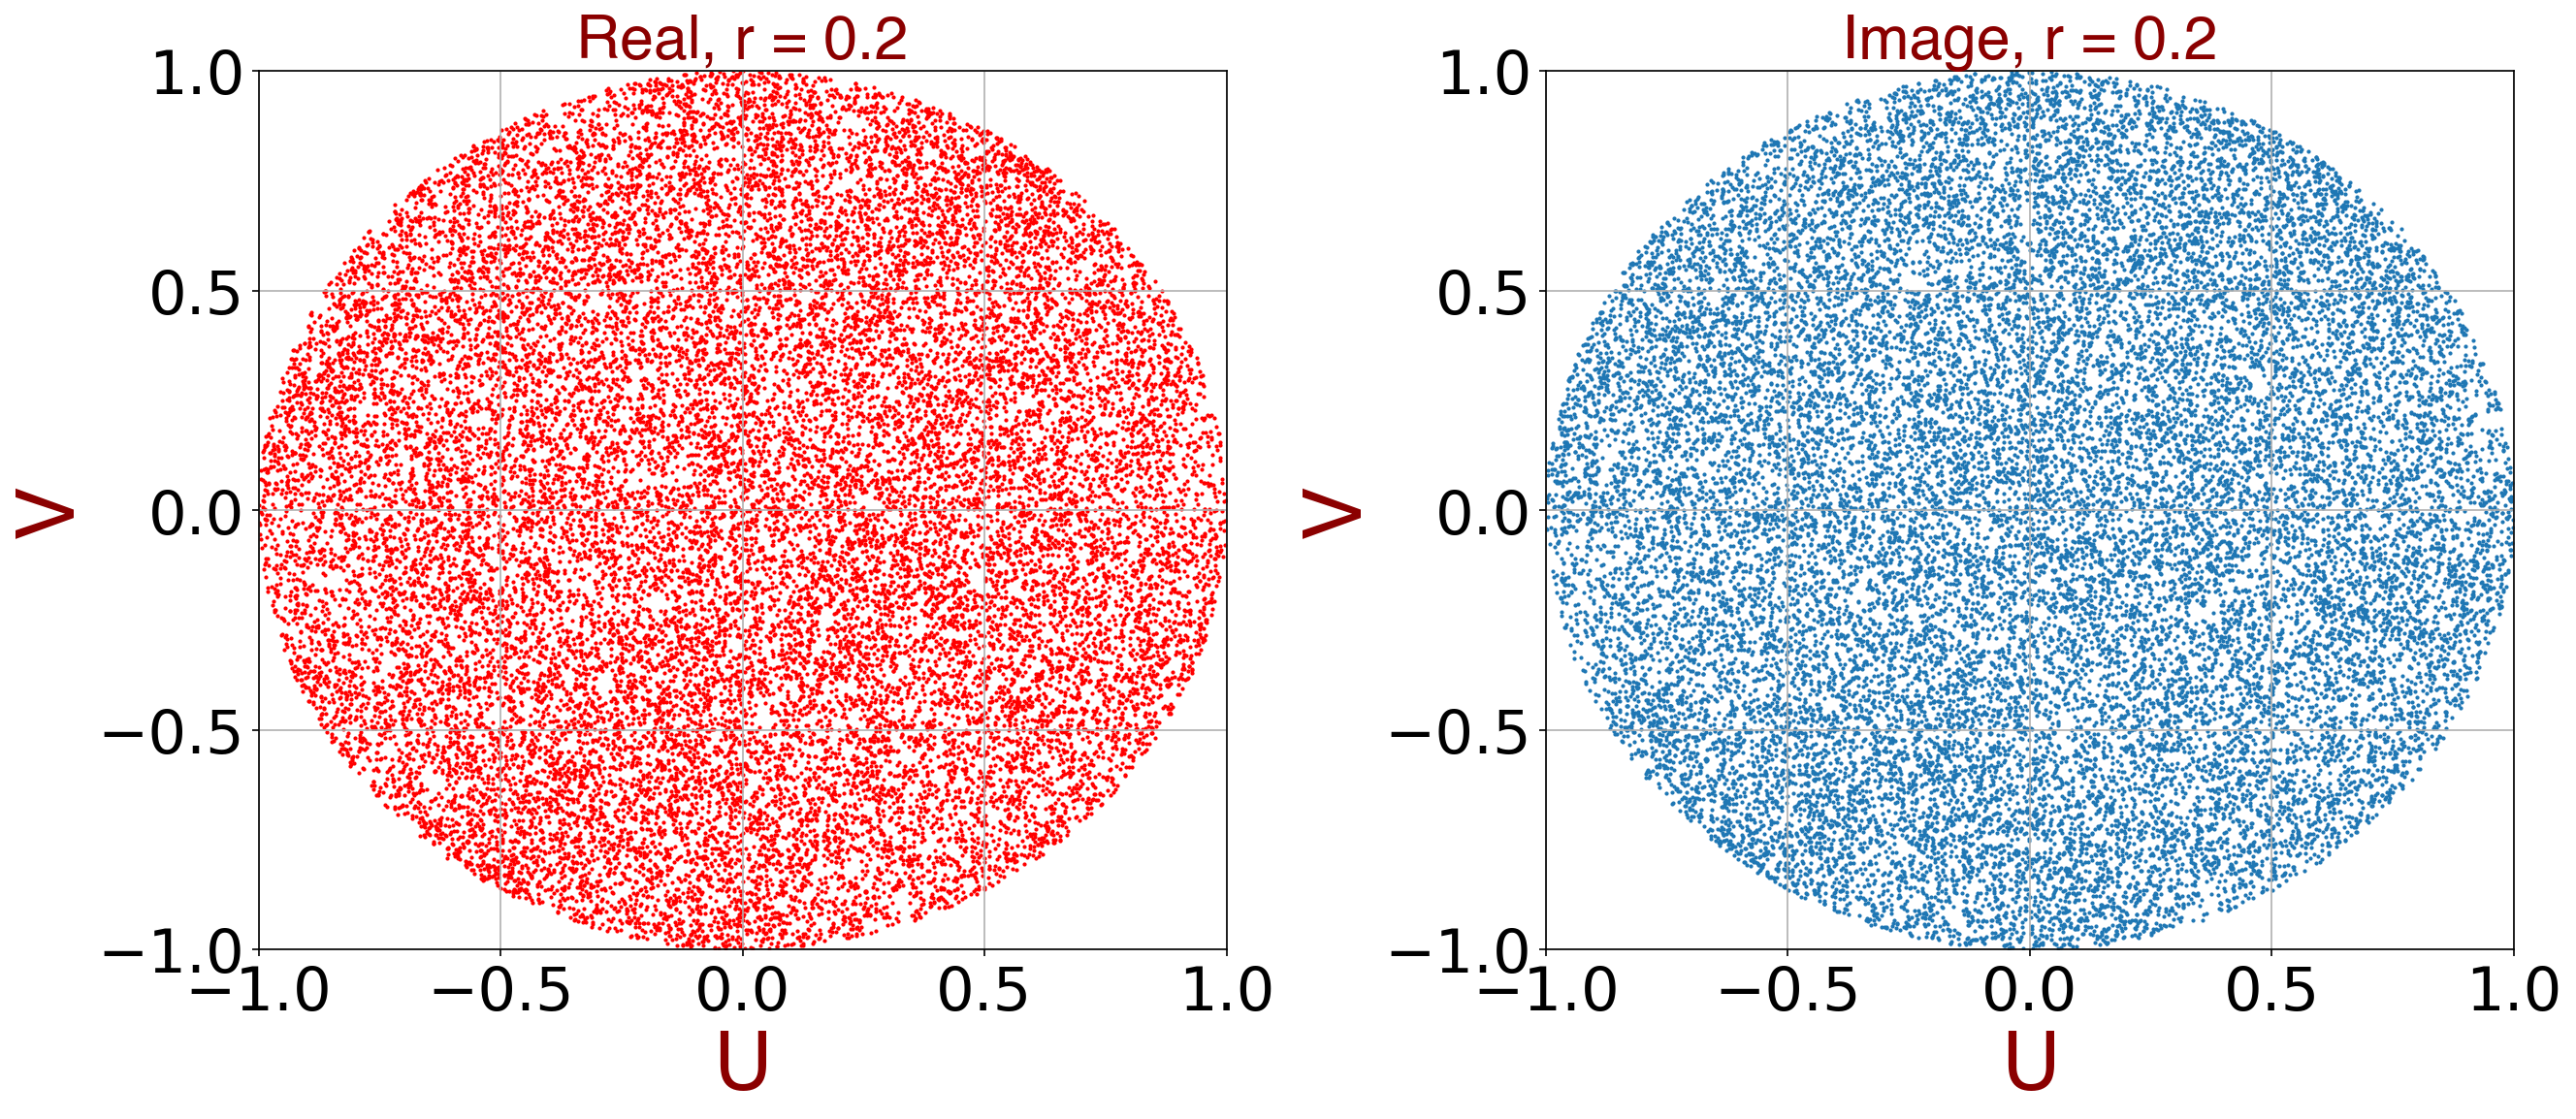

last norm:  1.0


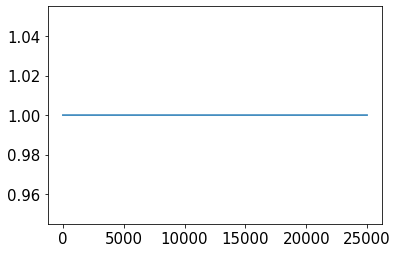

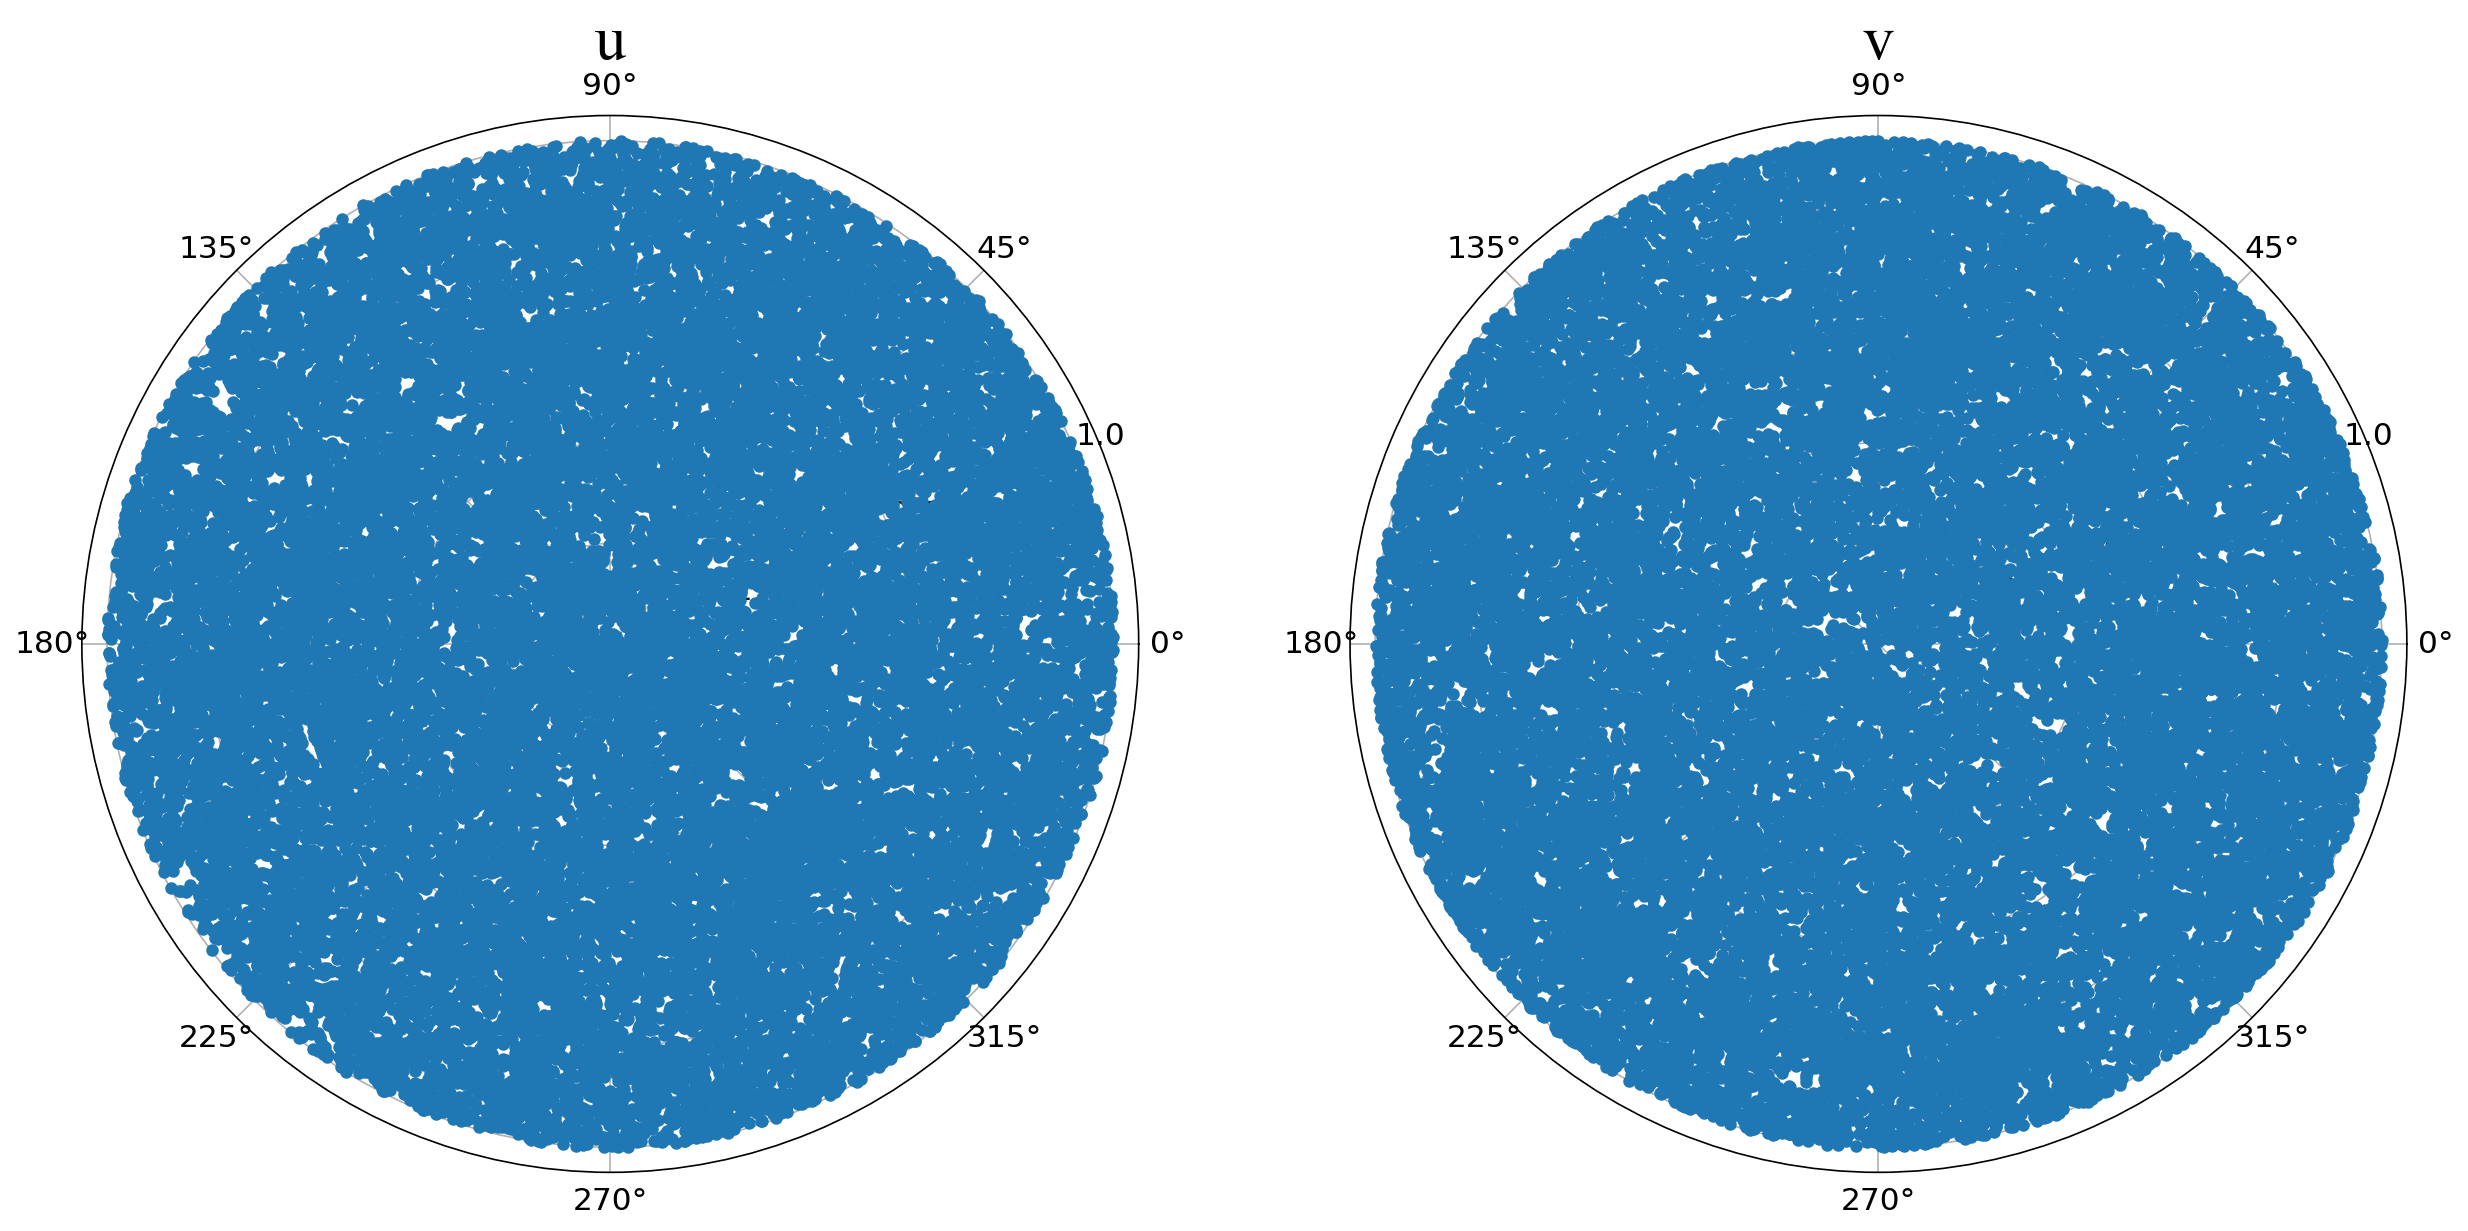

In [56]:
#  plot for (u, v)
fig = plt.figure(figsize=(20, 8), dpi=150)
fig.subplots_adjust(wspace=0.33)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sc1 = ax1.scatter(U.real,V.real, s=1, c='red')
sc2 = ax2.scatter(U.imag,V.imag, s=1)

limit=np.max(np.ceil(np.absolute(U))) # set limits for axis
ax1.axis(xmin=-limit,xmax=limit, ymin=-limit, ymax=limit)
ax2.axis(xmin=-limit,xmax=limit, ymin=-limit, ymax=limit)

ax1.set_xlabel('U', fontdict=font)
ax1.set_ylabel('V', fontdict=font)
ax2.set_xlabel('U', fontdict=font)
ax2.set_ylabel('V', fontdict=font)

ax1.set_title('Real, r = ' + str(r), fontdict=fontTitle)
ax1.grid()
ax1.tick_params(labelsize=textsize)
ax2.set_title('Image, r = ' + str(r), fontdict=fontTitle)
ax2.tick_params(labelsize=textsize)
ax2.grid()

plt.show()

#  plot for (u, v)
fig1 = plt.figure(figsize=(10,8), dpi=150)
limit=np.max(np.ceil(np.absolute(U))) # set limits for axis
plt.axis(xmin=-limit,xmax=limit, ymin=-limit, ymax=limit)

plt.scatter(U.real,V.real, s=1, c='red')
plt.xlabel('U', fontdict=font)
plt.ylabel('V', fontdict=font)
plt.title('Real', fontdict=fontTitle)
plt.grid()
plt.tick_params(labelsize=textsize)
#fig1.savefig('images/qubit/qubit_uv_re,' + 'r=' + str(r) + ',f0=' + str(phi) + ',ge=' + str(ge) + '.png', dpi=fig.dpi)
plt.close(fig1)

fig2 = plt.figure(figsize=(10,8), dpi=150)
limit=np.max(np.ceil(np.absolute(U))) # set limits for axis
plt.axis(xmin=-limit,xmax=limit, ymin=-limit, ymax=limit)
plt.scatter(U.imag,V.imag, s=1)
plt.xlabel('U', fontdict=font)
plt.ylabel('V', fontdict=font)
plt.title('Image', fontdict=fontTitle)
plt.tick_params(labelsize=textsize)
plt.grid()

#fig2.savefig('images/qubit/qubit_uv_im,' + 'r=' + str(r) + ',f0=' + str(phi) + ',ge=' + str(ge) + '.png', dpi=fig.dpi)
plt.close(fig2)

#  norm of the spinor (u, v).T
ss = []
for i in range(len(U)):
    ss.append(np.sqrt(abs(U[i])**2 + abs(V[i])**2))
    
ss = np.round(ss, 4)
plt.plot(ss)

print('last norm: ', ss[-1])


#  polar plot for u(r, angle) and v(r, angle)
angleU = list(map(lambda x: mp.atan2(x.real, x.imag), U))
radU = abs(U)
angleV = list(map(lambda x: mp.atan2(x.real, x.imag), V))
radV = abs(V)

fig = plt.figure(figsize=(20, 10), dpi=150)
fig.subplots_adjust(wspace=0.2)
plt.rcParams.update({'font.size': 15})
ax1 = fig.add_subplot(121, polar=True)
ax2 = fig.add_subplot(122, polar=True)

sc1 = ax1.plot(angleU, radU, marker='o', markersize=5, linestyle = 'None')
sc2 = ax2.plot(angleV, radV, marker='o', markersize=5, linestyle = 'None')

ax1.set_title('u', fontname='Times New Roman', size=30)
ax2.set_title('v', fontname='Times New Roman', size=30)
plt.show()

fig = plt.figure(figsize=(10,8), dpi=300)
plt.polar(angleU, radU, marker='o', markersize=5, linestyle = 'None')
plt.title('u', fontdict=fontTitle)
plt.tick_params(labelsize=textsize)
plt.yticks([radU[-1]])
#fig.savefig('images/qubit/qubit_polaru,' + 'r=' + str(r) + ',f0=' + str(phi) + ',ge=' + str(ge) + '.png', dpi=fig.dpi)
plt.close(fig)


fig = plt.figure(figsize=(10,8), dpi=300)
plt.polar(angleV, radV, marker='o', markersize=5, linestyle = 'None')
plt.title('v', fontdict=fontTitle)
plt.tick_params(labelsize=textsize)
plt.yticks([radV[-1], radU[0]])
#fig.savefig('images/qubit/qubit_polarv,' + 'r=' + str(r) + ',f0=' + str(phi) + ',ge=' + str(ge) + '.png', dpi=fig.dpi)
plt.close(fig)

## Plot Bloch sphere for qubit

CPU times: user 10.5 s, sys: 332 ms, total: 10.9 s
Wall time: 10.7 s


<Figure size 432x288 with 0 Axes>

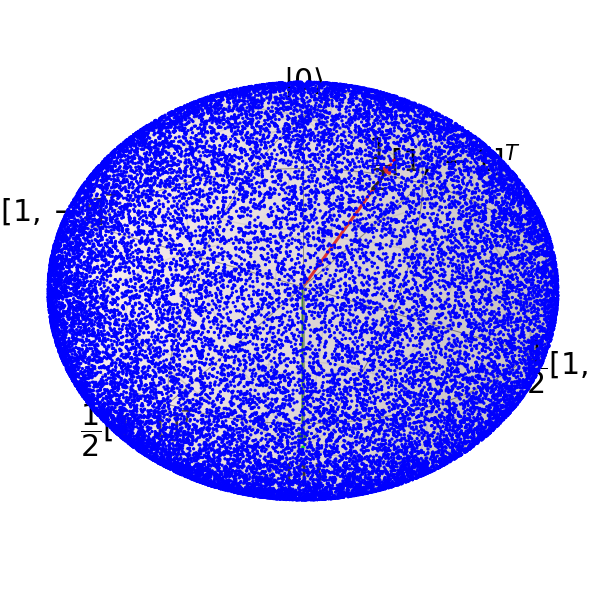

In [24]:
%%time

def add_states(self, state, kind='vector'):
        """Add a state vector Qobj to Bloch sphere.

        Parameters
        ----------
        state : qobj
            Input state vector.

        kind : str {'vector','point'}
            Type of object to plot.

        """
        if isinstance(state, Qobj):
            state = [state]

        for st in state:
            vec = [expect(sigmax(), st),
                   expect(sigmay(), st),
                   expect(sigmaz(), st)]

            if kind == 'vector':
                self.add_vectors(vec)
            elif kind == 'point':
                self.add_points(vec, 'l')

thett = np.array([complex(np.arcsin(2 * u * v)) for u, v in zip(U, V)])
phii = np.array([complex(-2j * np.log(u / np.cos(complex(np.arcsin(2 * u * v))/2))) for u, v in zip(U, V)])

#print(U[1])
#print(np.cos(thett[1]/2)*np.exp(1j * phii[1]/2))
#print(V[1])
#print(np.sin(thett[1]/2)*np.exp(-1j * phii[1]/2))

states = list(map(lambda theta, phi: qutip.Qobj([[np.cos(theta/2)*np.exp(1j * phi/2)],[np.sin(theta/2)*np.exp(-1j * phi/2)]]).unit(), 
             thett, phii))

#states1 = list(map(lambda u, v: qutip.Qobj([[u],[v]]).unit(), 
 #            U, V))

vec = [qutip.expect(qutip.sigmax(), states),
       qutip.expect(qutip.sigmay(), states),
       qutip.expect(qutip.sigmaz(), states)]

#plt.plot([np.sqrt(sum(abs(np.asarray(states[i]))**2)) for i in range(len(states))], 'o', markersize=1)
#plt.show()

colors = ['blue' for i in range(len(states))]
colors[-1] = 'red'
colors[0] = 'lime'
#print(colors)

b = qutip.Bloch(figsize=(10,8))


## customize sphere properties ##
b.point_color = colors # options: 'r', 'g', 'b' etc.
b.vector_color = ['green', 'red']
b.point_size = [5]
b.point_marker = 'o'
b.xlabel = ['$ \dfrac{1}{2} [1, 1]^T $', '$ \dfrac{1}{2} [1, -1]^T $']
b.ylabel = ['$ \dfrac{1}{2} [1, i]^T $', '$ \dfrac{1}{2} [1, -i]^T $']
b.frame_width = 1
b.add_states([states[0], states[-1]])
#b.add_states([states[0], states[-1]], 'point')

b.add_points(vec, meth='m')
#b.add_points([vec[0][0], vec[1][0], vec[2][0]], 'm')
#b.add_points([vec[0][-1], vec[1][-1], vec[2][-1]], 'red')
b.font_size = textsize
plt.tight_layout()
b.view = [-60, 30]

b.render()

bb = b.fig

In [14]:
bb.savefig('images/oscillator/oscBloch,' + 'r=' + str(r) + ',f0=' + str(f0) + ',ge=' + str(ge) + '.png',dpi=150)

# Спектр мощности

25001


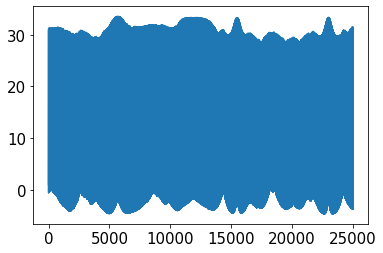

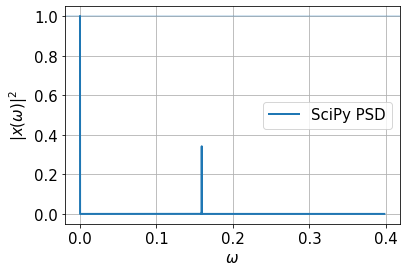

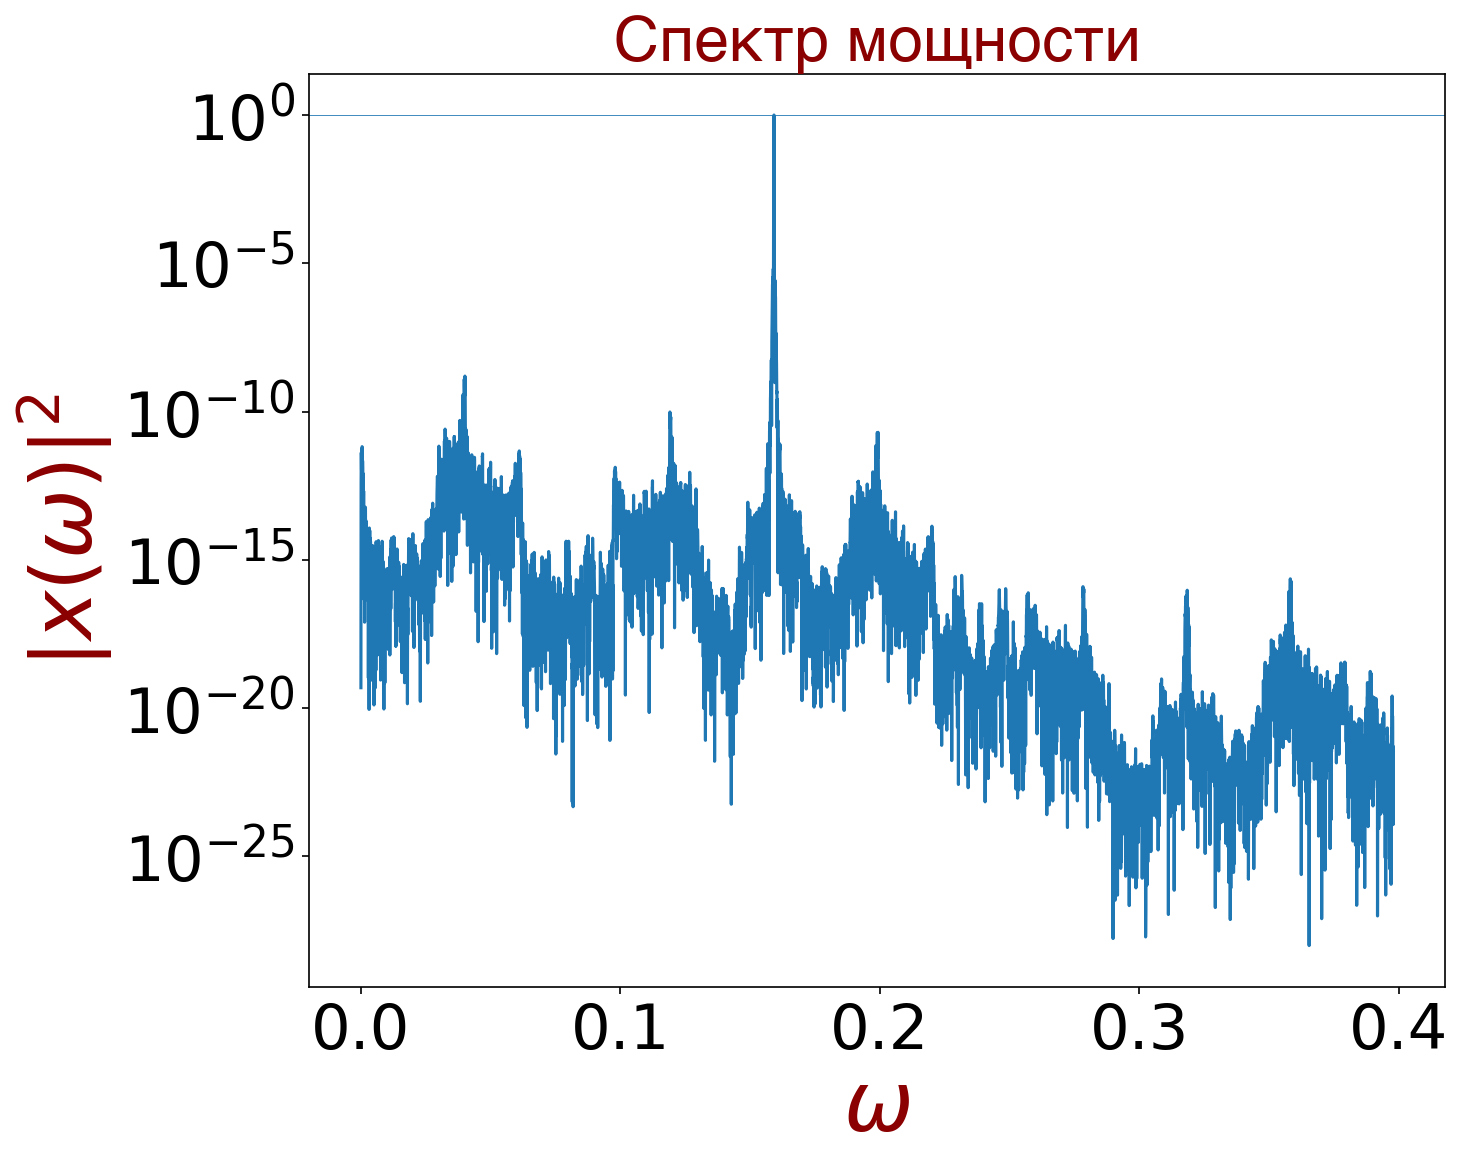

In [57]:
import scipy as sp
from scipy import signal


print(len(Q))
data = np.real(Q)
plt.plot(data)
plt.show()
fourier = abs(sp.fft.fft(data))**2
#fourier = np.mean(fourier)
fourier /= np.max(fourier)

n = data.size
timestep = Tk
freq = np.fft.fftfreq(n, d=timestep)
mask = freq>=0

plt.plot(freq[mask], fourier[mask], label='SciPy PSD', lw=2)
#plt.plot(freq[~mask], fourier[~mask])  #  отрицательная часть ввиду симметрии преобразования Фурье
plt.grid()
plt.axhline(y=10e-1, lw=0.4)
plt.legend()
#plt.xlim([-0.1, 5])
plt.xlabel('$\omega$')
plt.ylabel('$|x( \omega)|^2$')
plt.show()


fs = 1/Tk
# signal.welch
f, Pxx_spec = signal.welch(data, fs, 'flattop', len(data), scaling='spectrum')
psd = abs(Pxx_spec)**2
psd /= max(psd)
plt.figure(figsize=(10,8), dpi=150)
plt.semilogy(f, psd)
plt.xlabel(r'$\omega$', fontdict=font)
plt.ylabel(r'$|x( \omega)|^2$', fontdict=font)
plt.title('Спектр мощности', fontdict=fontTitle)
plt.tick_params(labelsize=textsize)
plt.tight_layout()
plt.axhline(y=1, lw=0.4)
plt.savefig('images/oscillator/psd,' + 'r=' + str(r) + ',f0=' + str(f0) + ',ge=' + str(ge) + '.png', dpi=fig.dpi)
plt.show()

## Показатель Ляпунова для данного случая

In [58]:
from scipy.integrate import solve_ivp


#  initial conditions
#-----------------------
#r = 0.33
#Tk = 2 * r * np.pi / w #  period of an external driving force 

#ge = 0.0002             #  coupling parameter
#phi = 0

f0 = 20               #  external driving force amplitude
q0 = 1                 #  initial coordinate
p0 = 1                 #  initial impulse
u0 = np.sqrt(1e-20/2)   #  initial spinor component U
v0 = np.sqrt(2/2)      #  initial spinor component V



print('Tk = ', Tk)
print('T = ', 2 * np.pi / w)


#  define system of motion equations 
def func(t, z, ge):
    p, q, u, v = z
    return [-w**2 * q - ge * (np.conj(u) * v + u * np.conj(v)), p, 
            ((w2 / 2) * u + ge * q * v)/1j, (-(w2 / 2) * v + ge * q * u)/1j]


def poincare(n_steps, p0, q0, u0, v0, r, ge):

    Tk = 2 * r * np.pi / w #  period of an external driving force 
    
    Q = np.zeros(n_steps + 1, dtype=complex) 
    P = np.zeros(n_steps + 1, dtype=complex)    
    U = np.zeros(n_steps + 1, dtype=complex)   
    V = np.zeros(n_steps + 1, dtype=complex)

    P[0] = p0
    Q[0] = q0
    U[0] = u0
    V[0] = v0

    #  mapping for (p, q, u, v)
    for n in notebook.tqdm(range(1, n_steps + 1)):

        tn = Tk * (n - 1)

        p01 = P[n - 1] + f0
        q01 = Q[n - 1]    
        u01 = U[n - 1]
        v01 = V[n - 1]

        z0 = [p01, q01, u01, v01]

        sol = solve_ivp(lambda t,y: func(t,y,ge), [tn ,tn + Tk], z0, atol=1e-6, rtol=1e-4)
        #solve_ivp(func, [tn ,tn + Tk], z0, args=(ge))

        #print(sol)
        P[n] = sol.y[0,-1]
        Q[n] = sol.y[1,-1]
        U[n] = sol.y[2,-1]
        V[n] = sol.y[3,-1]
    return P, Q, U, V


T_steps = 25000
P1, Q1, U1, V1 = poincare(T_steps, p0, q0, u0, v0, r, ge)
P2, Q2, U2, V2 = poincare(T_steps, p0 + 1e-6, q0, u0, v0, r, ge)
dx = np.abs(Q2 - Q1)
dp = np.abs(P2 - P1)
du = np.abs(U2 - U1)
dv = np.abs(V2 - V1)
Dist = np.abs(dx**2 + dp**2 + du**2 + dv**2)
LogDist = np.log(Dist)
print(LogDist[-1])
print(np.mean(LogDist))

Tk =  1.2566370614359172
T =  6.283185307179586


  0%|          | 0/25000 [00:00<?, ?it/s]

  0%|          | 0/25000 [00:00<?, ?it/s]

5.3779848247109125
4.5040212480967075


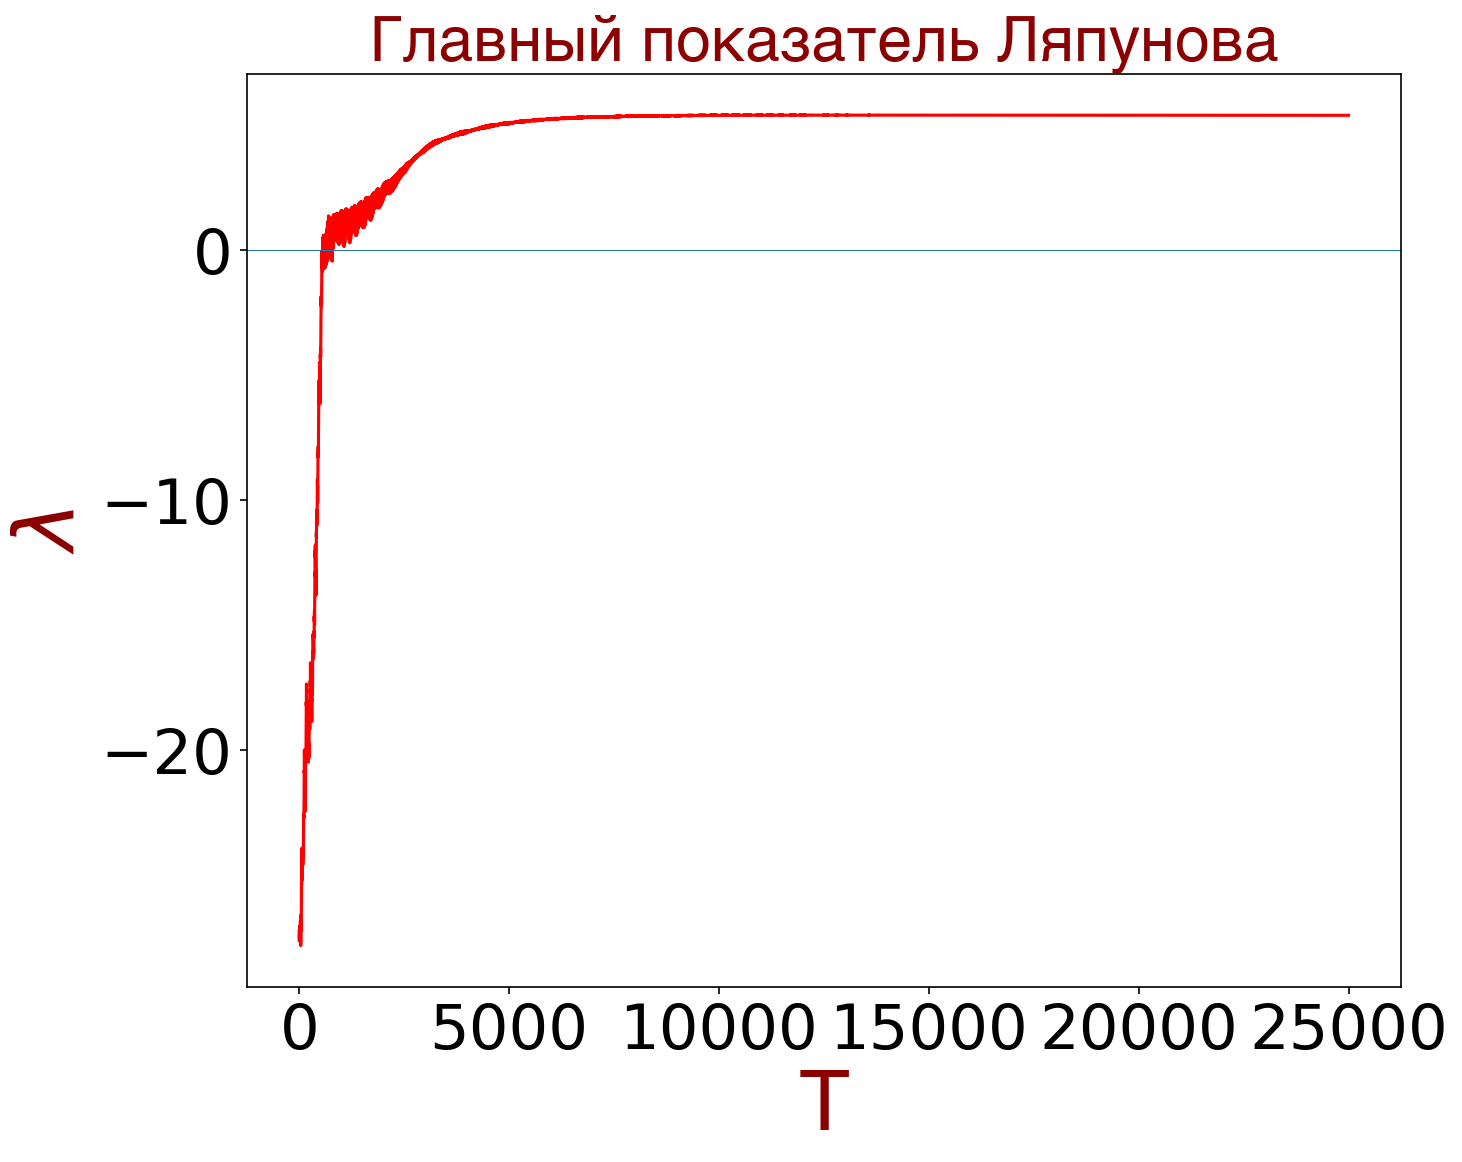

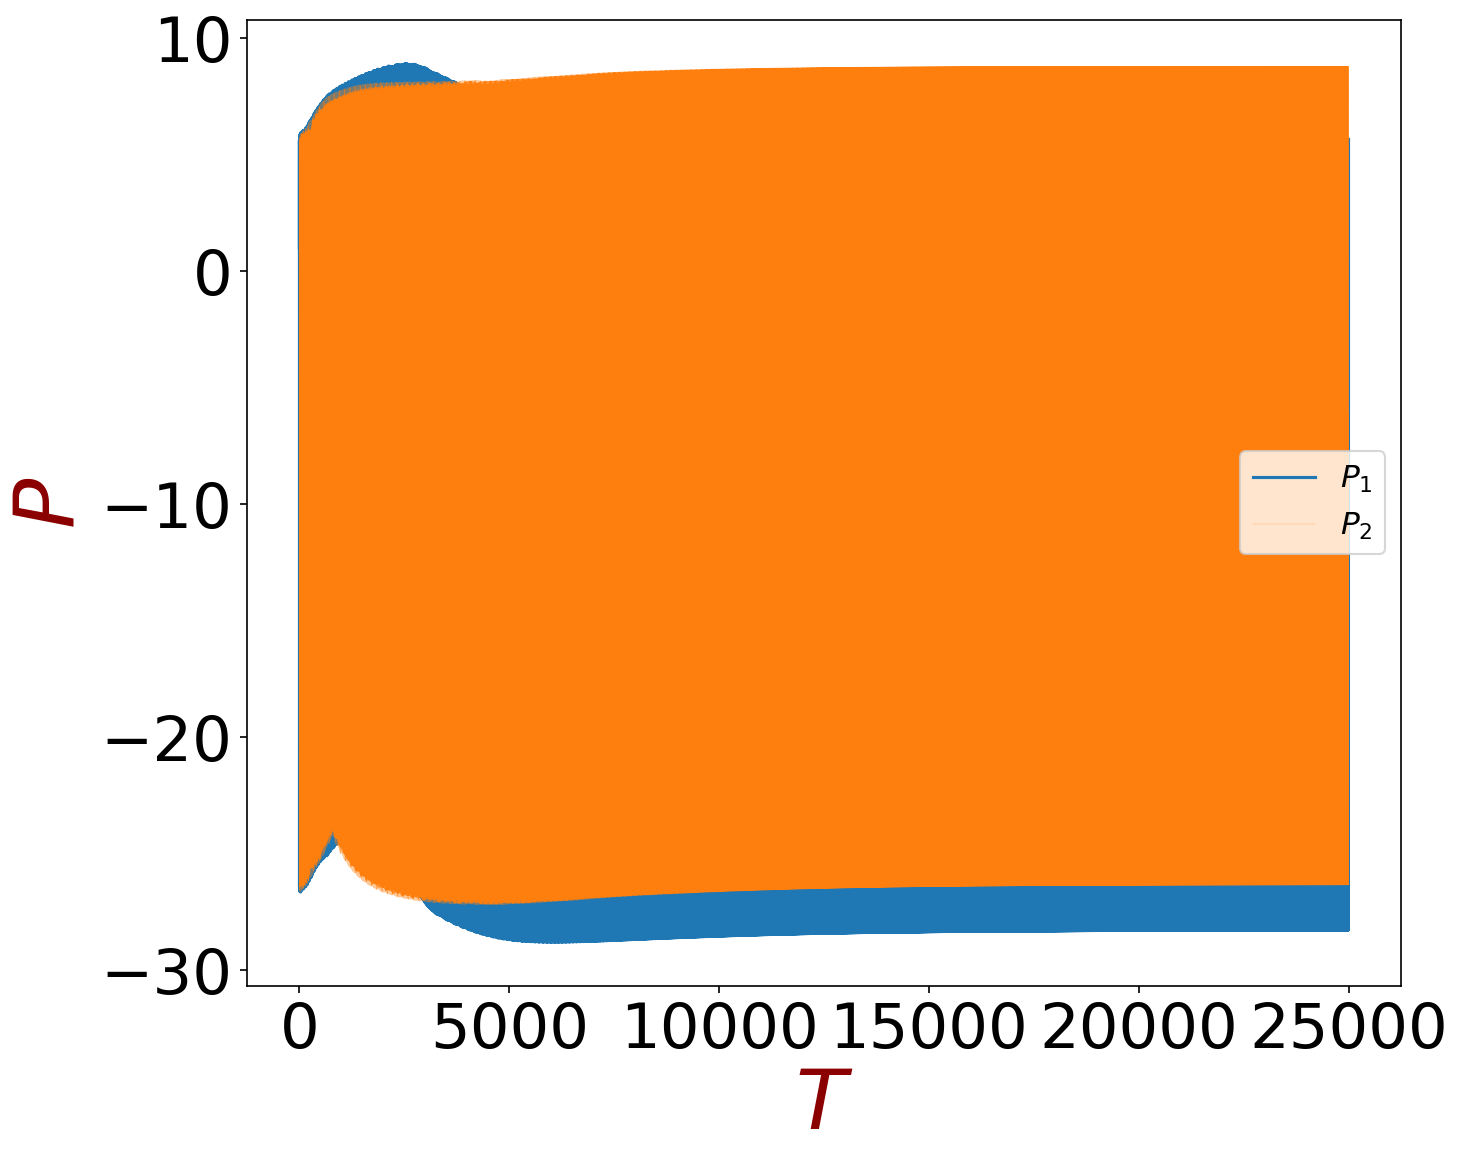

In [59]:
plt.figure(figsize=(10, 8), dpi=150)
plt.plot(LogDist, c='red')
plt.axhline(y=0, lw=0.5)
plt.xlabel('T', fontdict=font)
plt.ylabel(r'$\lambda$', fontdict=font)
plt.tick_params(labelsize=textsize)
plt.title('Главный показатель Ляпунова', fontdict=fontTitle)
plt.tight_layout()
plt.savefig('images/oscillator/mainlyap,' + 'r=' + str(r) + ',f0=' + str(f0) + ',ge=' + str(ge) + '.png',dpi=150)
plt.show()

plt.figure(figsize=(10, 8), dpi=150)
plt.plot(np.real(P1), label='$P_1$')
plt.plot(np.real(P2), '-', lw=0.1, label='$P_2$')
plt.xlabel(r'$T$', fontdict=font)
plt.ylabel(r'$P$', fontdict=font)
plt.tick_params(labelsize=textsize)
plt.legend()
plt.tight_layout()
plt.savefig('images/oscillator/difftr,' + 'r=' + str(r) + ',f0=' + str(f0) + ',ge=' + str(ge) + '.png',dpi=150)
plt.show()

The jupyternotify extension is already loaded. To reload it, use:
  %reload_ext jupyternotify


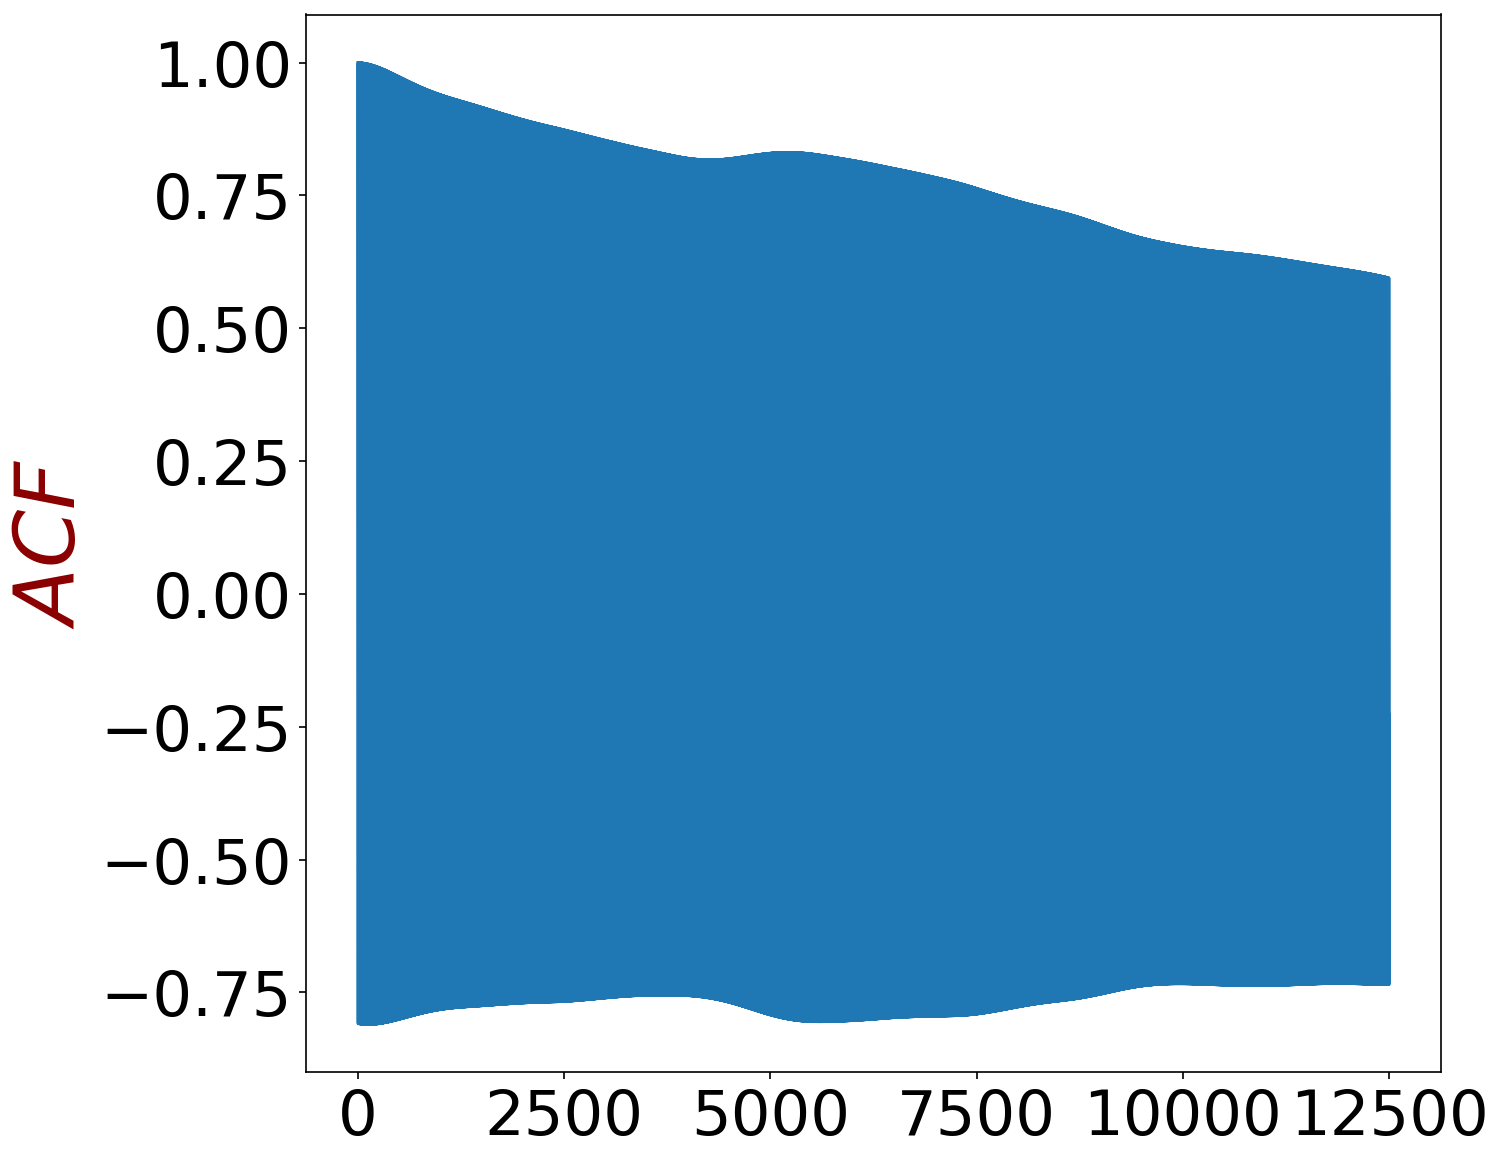

<IPython.core.display.Javascript object>

In [60]:
%load_ext jupyternotify
def autocorrelation(x) :
    """
    Compute the autocorrelation of the signal, based on the properties of the
    power spectral density of the signal.
    """
    xp = x-np.mean(x)
    f = np.fft.fft(xp)
    p = np.abs(f)**2
    pi = np.fft.ifft(p)
    return np.real(pi)[:x.size//2]/np.sum(xp**2)

plt.figure(figsize=(10, 8), dpi=150)
plt.plot(autocorrelation(data))
plt.ylabel(r'$ACF$', fontdict=font)
plt.tick_params(labelsize=textsize)
plt.tight_layout()
plt.savefig('images/oscillator/acorr,' + 'r=' + str(r) + ',f0=' + str(f0) + ',ge=' + str(ge) + '.png',dpi=150)
plt.show()
%notify